# Necessary simplifications

## Overview

**Questions**
- What other files?

**Objectives**
- Know that additional files are used to define a consistent appearance.
- Understand how top and bottom banners can be used to brand training/teaching material.
- Know that README.md in the root of the repository is converted to `index.html` in the html build.

Molecular dynamics (MD) is a powerful simulation technique in it's own right. 
However, in order to apply MD to practical simulations (e.g. of **real** systems), some simplifications must be made.

## Cut-offs

If we plot the Lennard-Jones potential all the way out to 15 Å, it will look something like this.

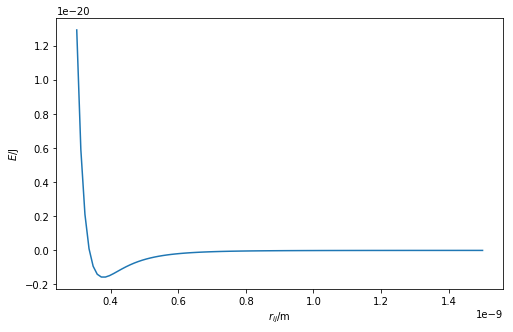

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def lj(rij, a, b):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the energy of the interaction.
    
    Parameters
    ----------
    rij: float
        Distance between two particles
    a: float 
        A parameter for interaction
    b: float 
        B parameter for interaction
    
    Returns
    -------
    float
        Energy of the interaction.
    """
    return a / np.power(rij, 12) - b / np.power(rij, 6)

r = np.linspace(3e-10, 15e-10, 100)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(r, lj(r, 1.363e-134, 9.273e-78))
ax.set_xlabel(r'$r_{ij}$/m')
ax.set_ylabel(r'$E$/J')
plt.show()

It is clear that as the particles move further away from each other, their interaction energy tends towards zero. 
The concept of a cut-off suggests that if two particles are found to be very far apart, there is no need to calculate thh energy/force. 
Instead the value is simply taken as 0,

$$       E(r_{ij})=\left\{
  \begin{array}{@{}ll@{}}
    \dfrac{A}{r_{ij}^{12}} - \dfrac{B}{r_{ij}^6}, & \text{if}\ a<15\text{ Å} \\
    0, & \text{otherwise.}
  \end{array}\right.
$$

This saves significant computation time, as power relationships (e.g. power-12 or power-6) are vey computationally expensive to calculate. 

This code below shows a modification of the Lennard-Jones potential that accounts for this cut-off.

The top banner consists of a single cell:
```html
<div class="w3-bar w3-padding" style="background-color:#3b93a6">
<div class="w3-bar-item"><h2> ARC Training </h2></div>
<div class="w3-bar-item w3-right"><img class="w3-image w3-right" style="width:40%;max-width:400px" src="../images/uob-logo-white-transparent.png"></div>
</div>
```
which appears as:

<div class="w3-bar w3-padding" style="background-color:#3b93a6">
<div class="w3-bar-item"><h2> ARC Training </h2></div>
<div class="w3-bar-item w3-right"><img class="w3-image w3-right" style="width:40%;max-width:400px" src="../images/uob-logo-white-transparent.png"></div>
</div>

You can customise:
- The background color of the highlighted cell, here we use University of Bath Research blue-grey
- The Title or branding of the course, here we brand with ARC, this could equally be the title of the course/lesson.
- And the logo.

Or you can go completely freestyle and change it completely.

The bottom banner is also a single cell:
```html
<div class="w3-bar" style="background-color:#3b93a6">
<a href="{previous}" class="w3-bar-item w3-button"><h2><i class="fa fa-angle-double-left"></i> Previous</h2></a>
<a href="{index}" class="w3-bar-item w3-button w3-center" style="width:60%"><h2>Schedule</h2></a>
<a href="{next}" class="w3-bar-item w3-button w3-right"><h2>Next <i class="fa fa-angle-double-right"></i></h2></a>
</div>
```
which appears as:

<div class="w3-bar" style="background-color:#3b93a6">
<a href="{previous}" class="w3-bar-item w3-button"><h2><i class="fa fa-angle-double-left"></i> Previous</h2></a>
<a href="{index}" class="w3-bar-item w3-button w3-center" style="width:60%"><h2>Schedule</h2></a>
<a href="{next}" class="w3-bar-item w3-button w3-right"><h2>Next <i class="fa fa-angle-double-right"></i></h2></a>
</div>

Here the {previous}, {index} (schedule) and {next} links are assigned when the notebooks are rendered.  You may want to change this but the build system currently expects to be able to assign these links during the build so significant changes may prevent a correct build.
**N.B. that in both these cases the cell appear in the *plain* notebook as they do in *rendered* form.  This is markdown at work, not the build system.**  The build system makes use of this feature of markdown when it renders the plain notebooks.

## Readme
The README.md forms an essential part of any well maintained repository, and we feel should be included in the html rendering.  Also since `00_schedule.*` is not `index` when the `html` is built, you can't just link to the root directory of the gh-pages or hosting directory because there is no `index.html` for the browser to hit.  So we render the `README.md` to `index.html` in the `html` build directory and add a link to the first page, `00_scehdule.html`, proper of the lesson.

## Key points
- top and bottom are used to decorate the schedule and episodes to provide a consistent appearance.
- Your README.md describing the project will be used as an index for the html so as always keep it up to date and informative.